# UTS PTA

In [1]:
import numpy as np
import pandas as pd

In [2]:
# df = pd.read_excel('PTA_crawl.xlsx')
df = pd.read_csv('Data_TA.csv')

df.head()

,NPM,Judul,Abstrak,Prodi,Kelas
0,4.041110e+10,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,Teknik Informatika,RPL
1,4.041110e+10,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,4.041110e+10,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,Web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,7.041110e+10,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Teknik Informatika,komputasi
4,8.041110e+10,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprosesing data

### Cek data yang bernilai null

In [4]:
df.isnull().sum()

NPM         0
Judul       6
Abstrak    25
Prodi       0
Kelas      43
dtype: int64

Absrak bernilai null sebanyak 3. 

Hapus data yang bernilai null

### Hapus Data Null

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Kelas      0
dtype: int64

Data null pada abstrak dihilangkan

### Cek data not null

In [7]:
df.count()

NPM        810
Judul      810
Abstrak    810
Prodi      810
Kelas      810
dtype: int64

In [8]:
## Cek data yang sudah dilabeli

In [9]:
df['Kelas'].value_counts()

komputasi    573
RPL          198
PBA           39
Name: Kelas, dtype: int64

### Plot menggunakan matplotlib

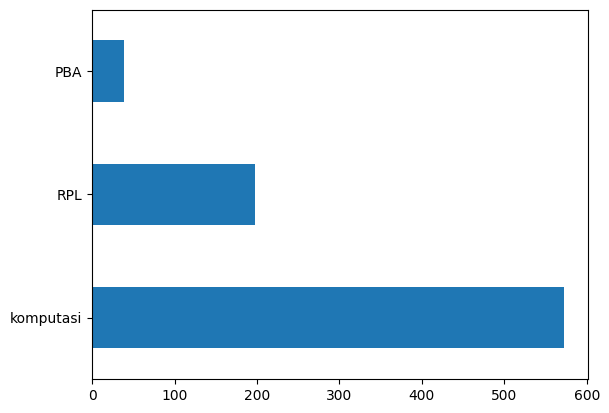

In [10]:
import matplotlib.pyplot as plt

df['Kelas'].value_counts().plot(kind='barh')
plt.show()

##Cleaning Text

In [11]:
import re, string

# Text Cleaning
def cleaning(text):
    # HTML Tag Removal
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [12]:
df['Judul'] = df['Judul'].apply(lambda x: cleaning(x))
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))

df.head()

,NPM,Judul,Abstrak,Prodi,Kelas
0,4.041110e+10,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL
1,4.041110e+10,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,4.041110e+10,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,7.041110e+10,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi
4,8.041110e+10,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


### Export Data Cleaning

In [13]:
df.to_csv('PTA_Cleaning.csv')

### Menghapus missing value

In [14]:
df = df.replace('', np.nan)

### Cek missing value

In [15]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Kelas      0
dtype: int64

### Hapus data null

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Kelas      0
dtype: int64

### Menghapus data Duplicate value

In [18]:
df[df['Judul'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Kelas
728,1.204110e+11,sistem pendukung keputusan pemilihan pemain bo...,peningkatan pembinaan permai bola voli terutam...,Teknik Informatika,komputasi


### Cek Data Kolom Judul

In [19]:
# Remove duplicates judul
df.drop_duplicates(subset=['Judul'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Kelas


### Cek Data Kolom Judul

In [20]:
# Remove duplicates abstrak
df.drop_duplicates(subset=['Abstrak'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Kelas


In [21]:
df.to_csv('PTA_preprocessing.csv')

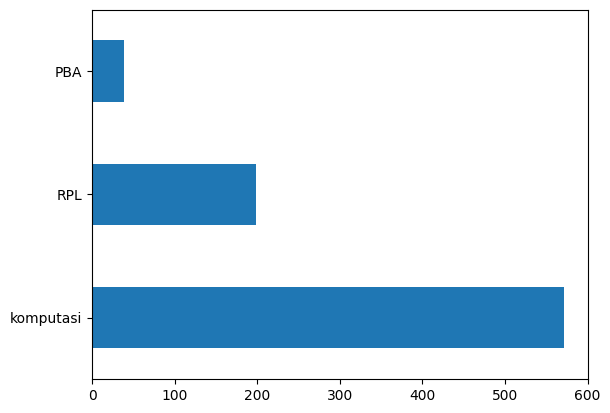

In [22]:
# Distribusi Kelas setelah Text Preprocessing
df['Kelas'].value_counts().plot(kind='barh')
plt.show()

## Tokenisasi

Memisahkan kalimat perkata 

In [23]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

###Tokenisasi Judul

In [24]:
# Tokenizing Judul
df['judul_tokens'] = df['Judul'].apply(lambda x: word_tokenize(x))
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[perancangan, dan, implementasi, sistem, datab..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, dan, monitoring, jaringan,..."
2,rancang bangun aplikasi proxy server untukenkr...,"[rancang, bangun, aplikasi, proxy, server, unt..."
3,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
4,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."


### Tokenisasi Abstrak

In [25]:
# Tokenizing Abstrak
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ..."


### Menghitung stop world

mendeteksi stop word pada kalimat

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['judul_tokens'] = df['judul_tokens'].apply(lambda x: [w for w in x if not w in stop_words])
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

### Stop Word Judul

In [28]:
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[perancangan, implementasi, sistem, database, ..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaringan, komp..."
2,rancang bangun aplikasi proxy server untukenkr...,"[rancang, bangun, aplikasi, proxy, server, unt..."
3,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
4,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."


### Stop Word Abstrak

In [29]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, lan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, berfun..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, perguruan, kompleks, per..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, didunia, mu..."


## Stemming Data

stemming digunakan untuk mengubah kata menjadi kata dasar

In [30]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 5.5 MB/s eta 0:00:00


In [31]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

### Stemming judul

In [32]:
# Stemming judul
df['judul_tokens'] = df['judul_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/809 [00:00<?, ?it/s]

In [33]:
# Hasil stemming judul
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[ancang, implementasi, sistem, database, distr..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaring, komput..."
2,rancang bangun aplikasi proxy server untukenkr...,"[rancang, bangun, aplikasi, proxy, server, unt..."
3,sistem pendukung keputusan optimasi penjadwala...,"[sistem, dukung, putus, optimasi, jadwal, mata..."
4,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, g..."


### Stemming abstrak

In [34]:
# Stemming abstrak
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/809 [00:00<?, ?it/s]

In [54]:
# Hasil stemming abstrak
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,sistem informasi akademik siakad sistem inform...
1,berjalannya koneksi jaringan komputer dengan l...,jalan koneksi jaring komputer lancar ganggu ha...
2,web server adalah sebuah perangkat lunak serve...,web server perangkat lunak server berfungsimen...
3,penjadwalan kuliah di perguruan tinggi merupak...,jadwal kuliah guru kompleks masalah variabel t...
4,seiring perkembangan teknologi yang ada diduni...,iring kembang teknologi dunia muncul teknologi...


In [36]:
df['judul_tokens'] = df['judul_tokens'].apply(lambda x: ' '.join(x))
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: ' '.join(x))

df.to_csv('DataOlah_Pta.csv')

In [55]:
dataOlah = pd.read_csv('DataOlah_Pta.csv', index_col=0)
dataOlah.head()

,NPM,Judul,Abstrak,Prodi,Kelas,judul_tokens,abstrak_tokens
0,4.041110e+10,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL,ancang implementasi sistem database distribusi...,sistem informasi akademik siakad sistem inform...
1,4.041110e+10,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL,aplikasi kontrol monitoring jaring komputer ba...,jalan koneksi jaring komputer lancar ganggu ha...
2,4.041110e+10,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL,rancang bangun aplikasi proxy server untukenkr...,web server perangkat lunak server berfungsimen...
3,7.041110e+10,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi,sistem dukung putus optimasi jadwal matakuliah...,jadwal kuliah guru kompleks masalah variabel t...
4,8.041110e+10,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi,sistem augmented reality animasi benda gerak f...,iring kembang teknologi dunia muncul teknologi...


## Modeling data

In [56]:
from sklearn.model_selection import train_test_split

X = dataOlah['abstrak_tokens']
y = dataOlah['Kelas']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Ekstraksi Fitur

term frequency-inverse document frequency


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(X)
# X_test_tfidf = vectorizer.transform(X_test)

X_tfidf.shape

(809, 6445)

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_new = pca.fit_transform(X_tfidf.toarray())

X_new

array([[-0.03136405, -0.10084104, -0.04465375, ...,  0.04910735,
         0.11095907,  0.1748506 ],
       [-0.02454623, -0.01320718, -0.00147942, ...,  0.03544528,
        -0.00317863,  0.01897009],
       [-0.03157088, -0.0043135 , -0.03518554, ..., -0.09368158,
         0.25018469, -0.06777085],
       ...,
       [ 0.24357226,  0.03520661, -0.05676702, ..., -0.05716858,
        -0.0756753 ,  0.01605384],
       [ 0.10493568,  0.00934633, -0.01137641, ..., -0.00557726,
        -0.07424993, -0.03692405],
       [ 0.07324   , -0.00195263,  0.03457288, ..., -0.01142812,
        -0.00884699, -0.02836635]])

In [59]:
terms = vectorizer.get_feature_names_out()

sums = X_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

             term       rank
5378       sistem  32.326873
1174         data  28.961093
940         citra  28.863751
3611       metode  28.708066
2086        hasil  27.116389
...           ...        ...
2011  grayscaling   0.051212
3656      minutea   0.051212
265      analyzer   0.040808
5162      seirver   0.040808
6367    wireshark   0.040808

[6445 rows x 2 columns]


### Oversampling

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Training data

### Naive bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

model_gnb = gnb.fit(X_train, y_train)

prediction_gnb = model_gnb.predict(X_test)

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction_gnb))

              precision    recall  f1-score   support

         PBA       0.39      0.88      0.55        17
         RPL       0.49      0.79      0.61        53
   komputasi       0.93      0.64      0.76       173

    accuracy                           0.69       243
   macro avg       0.60      0.77      0.64       243
weighted avg       0.79      0.69      0.71       243



### KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
model_knn = neigh.fit(X_train, y_train)


prediction_knn  = model_knn.predict(X_test)



In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

         PBA       0.62      0.29      0.40        17
         RPL       0.70      0.85      0.77        53
   komputasi       0.89      0.88      0.89       173

    accuracy                           0.84       243
   macro avg       0.74      0.68      0.69       243
weighted avg       0.83      0.84      0.83       243



## Evaluasi data

In [65]:
predictions_knn = model_knn.predict(X_test)
predictions_gnb = model_gnb.predict(X_test)

In [66]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions_knn))
print('======================')
print(metrics.confusion_matrix(y_test, predictions_gnb))

[[  5   2  10]
 [  0  45   8]
 [  3  17 153]]
[[ 15   1   1]
 [  3  42   8]
 [ 20  42 111]]


In [49]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###KNN

In [67]:
# Print a classification report
print(metrics.classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

         PBA       0.62      0.29      0.40        17
         RPL       0.70      0.85      0.77        53
   komputasi       0.89      0.88      0.89       173

    accuracy                           0.84       243
   macro avg       0.74      0.68      0.69       243
weighted avg       0.83      0.84      0.83       243



In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions_knn))
print('Precision score : ', precision_score(y_test, predictions_knn, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_knn, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_knn, average='weighted'))

Accuracy score :  0.8353909465020576
Precision score :  0.8340744801819363
Recall score :  0.8353909465020576
F1 score :  0.8290484183249041


### NAIVE BAYES GAUSSIAN

In [69]:
# Print a classification report
print(metrics.classification_report(y_test, predictions_gnb))

              precision    recall  f1-score   support

         PBA       0.39      0.88      0.55        17
         RPL       0.49      0.79      0.61        53
   komputasi       0.93      0.64      0.76       173

    accuracy                           0.69       243
   macro avg       0.60      0.77      0.64       243
weighted avg       0.79      0.69      0.71       243



In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions_gnb))
print('Precision score : ', precision_score(y_test, predictions_gnb, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_gnb, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_gnb, average='weighted'))

Accuracy score :  0.691358024691358
Precision score :  0.7939249448967372
Recall score :  0.691358024691358
F1 score :  0.7103378400471605
